# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle
import tensorflow as tf
import numpy as np
import pandas as pd
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
import random
import cv2
from numpy import newaxis
# Visualizations will be shown in the notebook.
%matplotlib inline

# TODO: Fill this in based on where you saved the training and testing data

training_file = "/Users/hemanth/Udacity/traffic-signs-data/train.p"
validation_file="/Users/hemanth/Udacity/traffic-signs-data/valid.p"
testing_file = "/Users/hemanth/Udacity/traffic-signs-data/test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']


## Read class labels in to python script

In [2]:
#import pandas as pd
classFileName = "/Users/hemanth/Udacity/CarND-Traffic-Sign-Classifier-Project/signnames.csv" 

class_data = pd.read_table(classFileName, delimiter=',')




In [3]:
#test for class Labels
#test[]test['labels'][0]
class_data.iloc[0,1]

'Speed limit (20km/h)'

### Function to find the count of unique values in the lables

In [4]:

def find_unique_count(labels_array):
    result = set(x  for x in labels_array)
    return len(result),list(x for x in result)
#find_unique_count(test['labels'])

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [5]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

# TODO: Number of training examples
n_train =X_train.shape[0]

# TODO: Number of validation examples
n_validation = X_valid.shape[0]

# TODO: Number of testing examples.
n_test = X_test.shape[0]

# TODO: What's the shape of an traffic sign image?
image_shape = test['features'][0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes,classes_labels = find_unique_count(test['labels'])


print("Number of training examples =", n_train)
print("Number of validation examples =", n_validation)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of validation examples = 4410
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


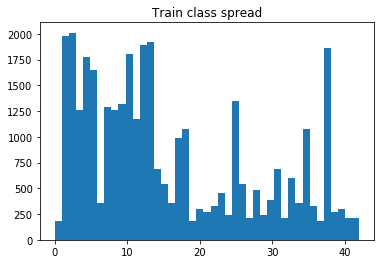

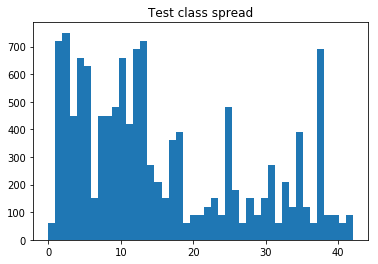

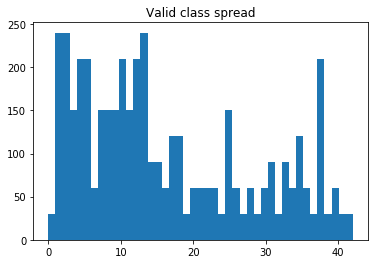

In [6]:
# Visualization of data

# Making a histogram for the distribution
plt.figure()
plt.hist(y_train, bins = 43)
plt.title('Train class spread')
    
# Making a histogram for the distribution
plt.figure()
plt.hist(y_test, bins = 43)
plt.title('Test class spread')

# Making a histogram for the distribution
plt.figure()
plt.hist(y_valid, bins = 43)
plt.title('Valid class spread')


It can be observed that the distribution of the train, validation and test set is similar. 
 Classes does not have a uniform distribution

### Include an exploratory visualization of the dataset

## visualize images for each class

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

/Applications/anaconda/envs/carnd-term1/lib/python3.5/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


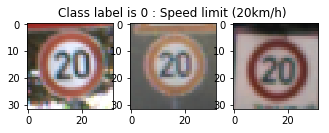

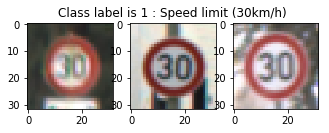

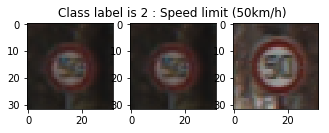

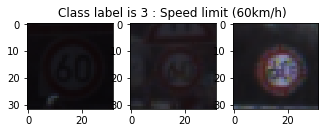

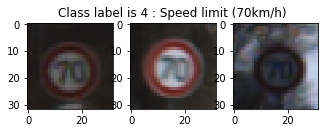

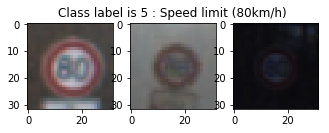

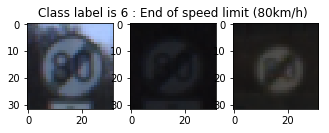

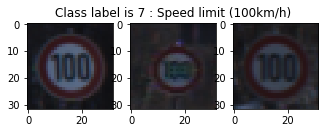

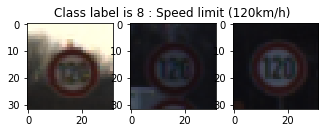

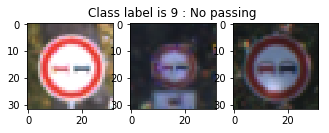

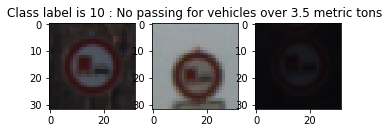

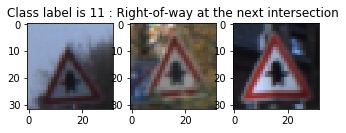

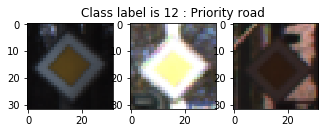

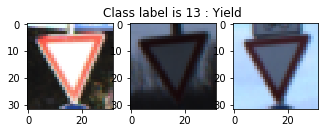

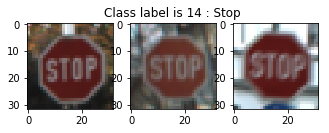

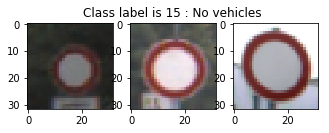

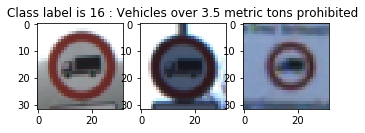

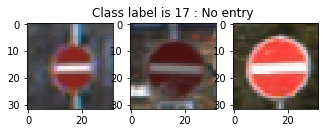

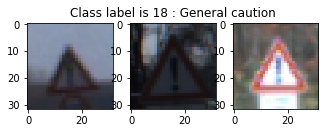

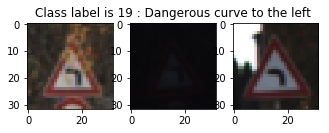

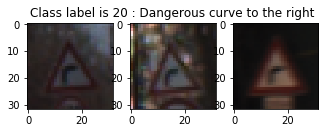

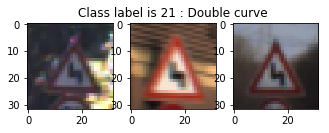

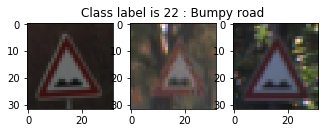

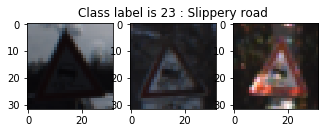

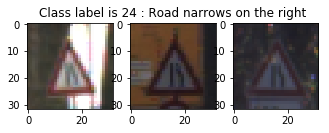

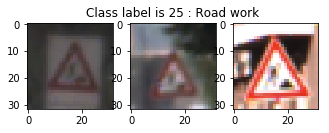

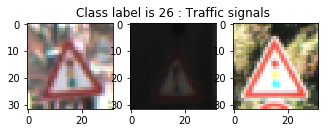

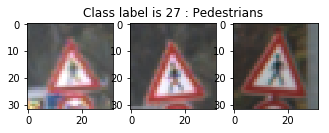

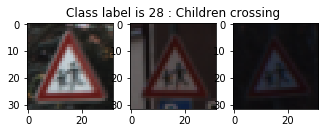

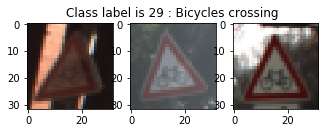

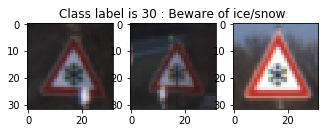

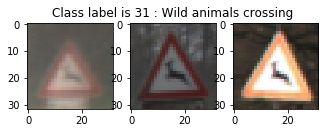

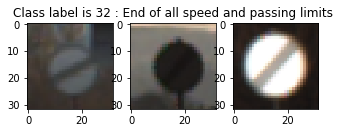

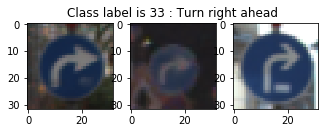

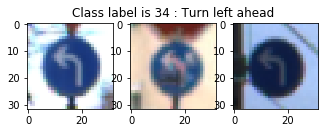

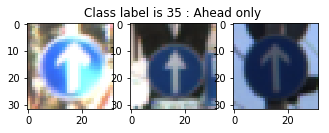

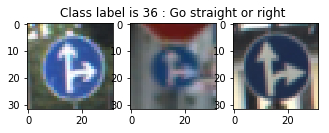

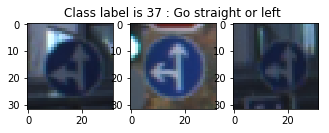

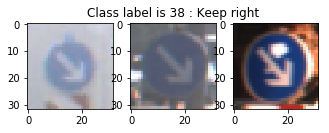

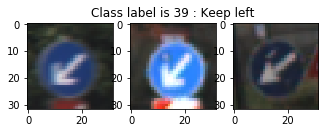

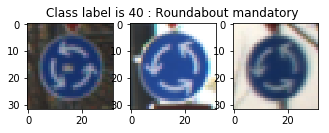

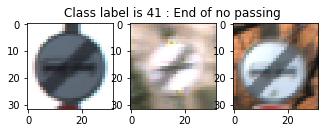

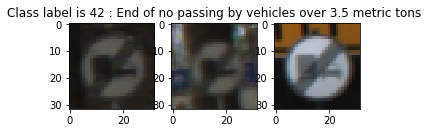

In [7]:

def visualizeClassIMages(image1,image2,image3,title,class_itr):
    plt.figure()
    plt.subplot(1,3,1)
    plt.imshow(image1)
    plt.subplots_adjust(right=.8)
    plt.subplot(1,3,2)
    plt.imshow(image2)
    plt.subplots_adjust(right=.8)
    plt.title("Class label is "+str(class_itr)+" : "+title)
    plt.subplot(1,3,3)
    plt.imshow(image3)
    

    
    
visualize_data=X_train
visualize_data_labels=y_train
for class_itr in range(n_classes):
    index_array=np.where(visualize_data_labels == class_itr)[0]
    array_len=len(index_array)
    random_int1=random.randint(0, array_len)
    random_int2=random.randint(0, array_len)    
    random_int3=random.randint(0, array_len)
    #plt.imshow(X_train[index_array[random_int1]])
    title=class_data.iloc[visualize_data_labels[index_array[random_int1]],1]
    index1=index_array[random_int1]
    index2=index_array[random_int2]
    index3=index_array[random_int3]
    visualizeClassIMages(visualize_data[index1],visualize_data[index2],visualize_data[index3],title,class_itr)
    

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [8]:
#import cv2

# Grayscales an image
def grayscale(img):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    return img

# Normalizes the data between 0.1 and 0.9 instead of 0 to 255    
def normalizeZerotoOne(data):
    return data / 255 * 0.8 + 0.1
# Normalizes the data between -1 and 1 instead of 0 to 255    
def normalizeNegOnetoPosOne(data):
    return (data-128*np.ones(np.shape(data))) / 128

# Iterates through grayscale for each image in the data
def preprocess(data):
    gray_images = []
    for image in data:
        gray = grayscale(image)
        gray_images.append(gray)
        
    return np.array(gray_images)

In [9]:
normalizeNegOnetoPosOne([255,128,0])

array([ 0.9921875,  0.       , -1.       ])

In [10]:


#from numpy import newaxis
#import numpy as np

print('Preprocessing training data...')

# Iterate through grayscale
#X_train = preprocess(X_train)
#print(X_train[0])
#X_train = X_train[..., newaxis]
#print(X_train[0])
# Normalize
X_train = normalizeNegOnetoPosOne(X_train) 

print('Finished preprocessing training data.')

# Double-check that the image is changed to depth of 1
image_shape2 = X_train.shape
print("Processed training data shape =", image_shape2)

print('Preprocessing testing data...')

# Iterate through grayscale
#X_test = preprocess(X_test)
#X_test = X_test[..., newaxis]

# Normalize
X_test = normalizeNegOnetoPosOne(X_test) 

# Iterate through grayscale
#X_valid = preprocess(X_valid)
#X_valid = X_valid[..., newaxis]

# Normalize
X_valid = normalizeNegOnetoPosOne(X_valid) 

print('Finished preprocessing testing data.')

# Double-check that the image is changed to depth of 1
image_shape3 = X_test.shape
print("Processed testing data shape =", image_shape3)

print('All data preprocessing complete.')



Preprocessing training data...
Finished preprocessing training data.
Processed training data shape = (34799, 32, 32, 3)
Preprocessing testing data...
Finished preprocessing testing data.
Processed testing data shape = (12630, 32, 32, 3)
All data preprocessing complete.


(12630, 32, 32, 3)


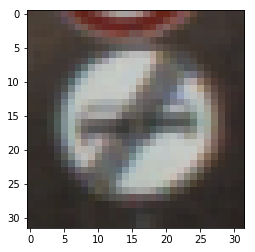

In [11]:
# Visiualize normalized train images
print(X_test.shape)
plt.imshow(cv2.resize(X_train[random_int1],(32,32)),cmap='gray')



## Features and Labels
Train LeNet to classify [MNIST](http://yann.lecun.com/exdb/mnist/) data.

`x` is a placeholder for a batch of input images.
`y` is a placeholder for a batch of output labels.

You do not need to modify this section.

### Model Architecture

In [12]:
### Define your architecture here.
### Feel free to use as many code cells as needed.
from tensorflow.contrib.layers import flatten

def LeNet(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    print(x)
    #  Layer 1: Convolutional. Input = 32x32x3. Output = 28x28x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 3, 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    #  Activation.
    conv1 = tf.nn.relu(conv1)
    print(conv1)
    #  Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    #  Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    #  Activation.
    conv2 = tf.nn.relu(conv2)
    print(conv2)
    #  Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # Flatten. Input = 5x5x16. Output = 400.
    fc0   = flatten(conv2)
    
    #  Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    #  Activation.
    fc1    = tf.nn.relu(fc1)
    print(fc1)
    
    # Dropout, to prevent overfitting
    fc1 = tf.nn.dropout(fc1, keep_prob)
    
    #  Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(84))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    #  Activation.
    fc2    = tf.nn.relu(fc2)
    
    # Dropout, to prevent overfitting
    fc2 = tf.nn.dropout(fc2, keep_prob)

    #  Layer 5: Fully Connected. Input = 84. Output = 43.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, 43), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits

In [13]:
# Model taining parameters 
EPOCHS = 10
BATCH_SIZE = 300

x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, (None))
keep_prob = tf.placeholder(tf.float32)
one_hot_y = tf.one_hot(y, 43)

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

## Training Pipeline
Create a training pipeline that uses the model to classify MNIST data.

You do not need to modify this section.

In [14]:
## Trained model here.
rate = 0.005
logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)


Tensor("Placeholder:0", shape=(?, 32, 32, 3), dtype=float32)
Tensor("Relu:0", shape=(?, 28, 28, 6), dtype=float32)
Tensor("Relu_1:0", shape=(?, 10, 10, 16), dtype=float32)
Tensor("Relu_2:0", shape=(?, 120), dtype=float32)


## Model Evaluation
Evaluate how well the loss and accuracy of the model for a given dataset.



In [15]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob : 1.0})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

## Train the Model
Run the training data through the training pipeline to train the model.

Before each epoch, shuffle the training set.

After each epoch, measure the loss and accuracy of the validation set.

Saved the model after training.



In [16]:
### Feel free to use as many code cells as needed.
save_file = '/Users/hemanth/Udacity/CarND-Traffic-Sign-Classifier-Project/train_model.ckpt'
saver = tf.train.Saver()

with tf.Session() as sess:
    sess.run(tf.initialize_all_variables())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            loss = sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob : 0.7})
            
        train_accuracy = evaluate(X_train, y_train)    
        validation_accuracy = evaluate(X_valid, y_valid)
        print("EPOCH {} ...".format(i+1))
        print("Train Accuracy = {:.3f}".format(train_accuracy))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    # Save the model
    saver.save(sess, save_file)
    print('Trained Model Saved.')

Instructions for updating:
Use `tf.global_variables_initializer` instead.
Training...

EPOCH 1 ...
Train Accuracy = 0.847
Validation Accuracy = 0.796

EPOCH 2 ...
Train Accuracy = 0.940
Validation Accuracy = 0.883

EPOCH 3 ...
Train Accuracy = 0.966
Validation Accuracy = 0.913

EPOCH 4 ...
Train Accuracy = 0.973
Validation Accuracy = 0.915

EPOCH 5 ...
Train Accuracy = 0.978
Validation Accuracy = 0.929

EPOCH 6 ...
Train Accuracy = 0.986
Validation Accuracy = 0.935

EPOCH 7 ...
Train Accuracy = 0.986
Validation Accuracy = 0.939

EPOCH 8 ...
Train Accuracy = 0.991
Validation Accuracy = 0.948

EPOCH 9 ...
Train Accuracy = 0.992
Validation Accuracy = 0.943

EPOCH 10 ...
Train Accuracy = 0.992
Validation Accuracy = 0.940

Trained Model Saved.


## Evaluate the Model
Once you are completely satisfied with your model, evaluate the performance of the model on the test set.

Be sure to only do this once!

If you were to measure the performance of your trained model on the test set, then improve your model, and then measure the performance of your model on the test set again, that would invalidate your test results. You wouldn't get a true measure of how well your model would perform against real data.

You do not need to modify this section.

In [17]:
with tf.Session() as sess:
    #saver.restore(sess, tf.train.latest_checkpoint('.'))
    saver.restore(sess,'/Users/hemanth/Udacity/CarND-Traffic-Sign-Classifier-Project/train_model.ckpt')

    test_accuracy = evaluate(X_test, y_test) 
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Test Accuracy = 0.933


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

In [18]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.import glob
import glob
filenames = [img for img in glob.glob("/Users/hemanth/Udacity/CarND-Traffic-Sign-Classifier-Project/webImages/*.PNG")]

filenames.sort() # ADD THIS LINE
images=[]
Y=[]
count=0
for img in filenames:
    n= cv2.imread(img)
    cv_rgb = cv2.cvtColor(n, cv2.COLOR_BGR2RGB)
    cv_rgb=cv2.resize(cv_rgb,(32, 32), interpolation = cv2.INTER_AREA)
    #plt.imshow(cv_rgb)
    if(count==0):
        #images=cv_rgb*0
        print("count is 0")
        #print(np.shape(images))
        
        
    images.append(cv_rgb)
    #print(np.shape(images))
        
    count+=1
    #print(count)
    Y.append(img.split("_")[1])
images=np.array(images)
# Iterate through grayscale
#images = preprocess(images)
#images = images[..., newaxis]

# Normalize
images = normalizeNegOnetoPosOne(images) 



count is 0


SIze of the test images (6, 32, 32, 3)


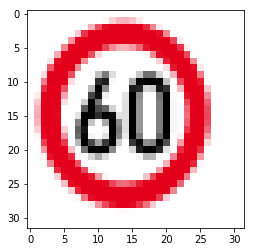

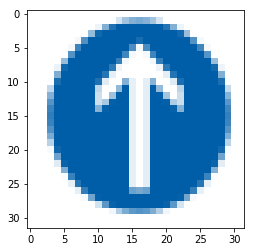

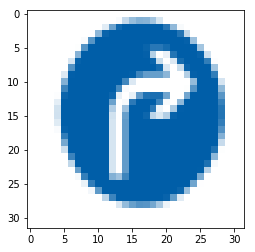

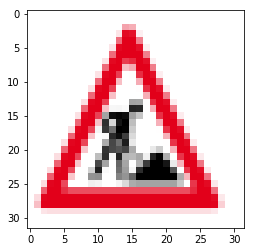

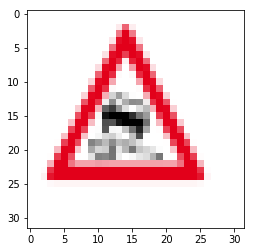

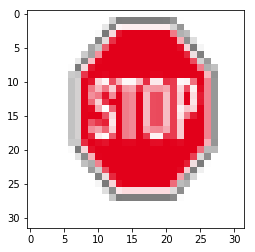

In [19]:
# Display all the test images
#cv_rgb = cv2.cvtColor(n, cv2.COLOR_BGR2RGB)
for img in range(6):
    n= cv2.imread(filenames[img])
    cv_rgb = cv2.cvtColor(n, cv2.COLOR_BGR2RGB)
    cv_rgb=cv2.resize(cv_rgb,(32, 32), interpolation = cv2.INTER_AREA)
    plt.figure()
    plt.imshow(cv_rgb)


print("SIze of the test images",images.shape)


### Predict the Sign Type for Each Image

In [20]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.
with tf.Session() as sess:
    saver.restore(sess, save_file)

    new_pics_classes = sess.run( tf.nn.softmax(logits), feed_dict={x: images, keep_prob : 1.0})


In [21]:
#print(new_pics_classes.shape)
#print(new_pics_classes)

### Analyze Performance

### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tk.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [22]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.
with tf.Session() as sess:
    predicts = sess.run(tf.nn.top_k(new_pics_classes, k=8, sorted=True))
    
for i in range(len(predicts[0])):
    print('Image', i, 'probabilities:', predicts[0][i], '\n and predicted classes:', predicts[1][i])
    
print("Class labels of Images: ",Y)

Image 0 probabilities: [  9.94940996e-01   4.70735831e-03   1.57816874e-04   8.65524999e-05
   8.33368831e-05   1.32933601e-05   1.04753644e-05   7.15720887e-08] 
 and predicted classes: [ 3  2 16  9  5  7 15  1]
Image 1 probabilities: [  1.00000000e+00   1.58982274e-16   1.59065669e-20   1.27800665e-20
   1.06318447e-21   8.20860436e-22   2.23572521e-22   4.47043333e-24] 
 and predicted classes: [35 33  9 34 37 13  3 10]
Image 2 probabilities: [  1.00000000e+00   1.50360003e-14   8.40688247e-16   4.85597361e-19
   2.64132421e-20   1.07875732e-22   3.48351667e-24   2.33714267e-25] 
 and predicted classes: [33 40 39 34 38 35 23 37]
Image 3 probabilities: [  1.00000000e+00   1.70044737e-30   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00] 
 and predicted classes: [25 29  0  1  2  3  4  5]
Image 4 probabilities: [  9.99842644e-01   1.40188931e-04   9.14557313e-06   5.83448582e-06
   1.66681025e-06   5.03040610e-07   1.16569687e-08   3.